In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# **Regressão Linear**

O modelo de regressão linear é uma técnica estatística no qual se busca entender a relação entre duas ou mais variáveis. Essas variáveis são as variáveis independentes (também conhecidas como "*features*") e uma variável dependente específica (também conhecida como "**target**"). 

A regressão linear é comumente usado para prever valores de uma variável (dependente ou *target*, ps.: também "alvo") com base em outras variáveis (independentes ou *features*). Por exemplo: 
- Preço de um imóvel em função do seu metro quadrado;
- Salário de um funcionário em função dos seus anos de estudo;
- Prever as vendas de um determinado produto e muito mais...

### **Quando aplicar?**

Em suma, o objetivo é encontrar uma equação linear (leia-se uma reta) que melhor se ajuste aos dados, permitindo a predição de valores futuros da variável dependente. 

A equação que representa a regressão linear é tipicamente da forma: `𝑦 = α + βx` 

Onde:
- 𝑦 é a variável dependente ou alvo que estamos tentando prever;
- x é a variável independente ou feature que usamos para fazer a previsão;
- α é o coeficiente linear, que representa o ponto inicial da reta, ou seja, o valor do eixo y quando x é igual a zero;
- β é o coeficiente angular, que representa a inclinação da linha de regressão, ou seja, o quanto essa variável cresce ao longo do tempo

E tendo a fórmula em mãos, temos que tentar diminuir o quanto nossa reta "erra" em suas predições, buscando minimizar uma loss function (função de custo) na hora de encontrar nossa reta "ideal". 

### **Método dos Mínimos Quadrados**

Aqui vamos utilizar o **Método dos Mínimos Quadrados** para ajustar nossa reta "ideal" de regressão aos dados. 

O método dos mínimos quadrados é uma técnica de otimização matemática que procura encontrar o ajuste adequado para um conjunto de dados tentando minimizar a soma dos quadrados das distâncias verticais entre cada ponto de dados e a linha de regressão.

Isso significa que, para cada ponto de dados, calculamos a distância vertical entre o ponto e a linha de regressão. Em seguida, elevamos essa distância ao quadrado e somamos todos os valores obtidos. O objetivo é encontrar a linha de regressão que minimize essa soma. Para entender melhor a matemática por trás: [ML normal equation in linear regression](https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression/)

Ao final da demonstração do MMQ temos: `θ = (XᵀX) -¹ (Xᵀ𝑦)`

Onde:
- θ: Parâmetro de hipótese que define os melhores coeficientes (α e β) 
- X: Conjunto dos dados da variável independente (features)
- 𝑦: Conjunto dos dados da variável dependente (target)

E vamos utilizar nosso modelo com método dos mínimos quadrados na prática criando uma variável chamada `theta_best` que irá fazer o cálculo da MMQ e uma função chamada `predict` que irá retornar os valores de previsão.

A variável `theta_best` é calculada utilizando a função `np.linalg.inv` que calcula a matriz inversa da transporta de X vezes X: `np.linalg.inv(X.T.dot(X))` e o resultado dessa equação é multiplicada pela transposta de X vezes y: `.dot(X.T).dot(y)`.

`theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)`

Aqui temos nossa função `predict` que nada mais é do que a fórmula da regressão linear citada mais acima: `𝑦 = α + βx`

In [ ]:
def predict(alpha, beta, X):
  return alpha + beta*X

Agora vamos utilizar a função make_regression da biblioteca sklearn para gerarmos um problema de regressão. 

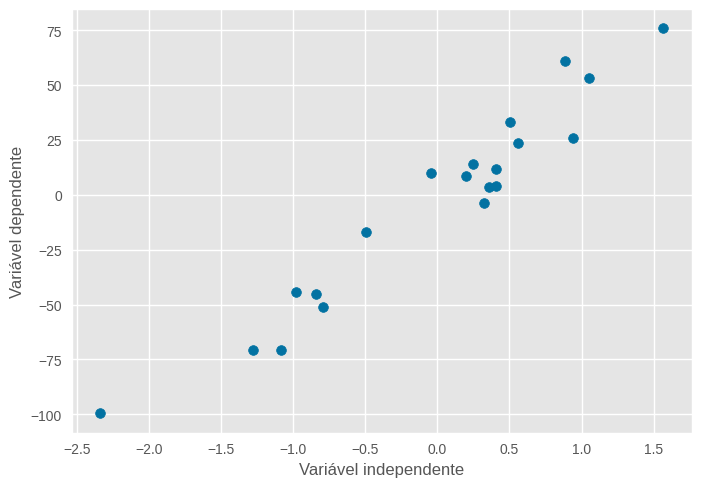

In [ ]:
# Importando o make_regression do sklearn.datasets
from sklearn.datasets import make_regression
  
# Gerando os dados com parâmetros pré definidos
X, y = make_regression(n_samples=20, n_features=1, n_informative=1, noise=10, random_state= 20)
  
# Plotando o gráfico de dispersão
plt.scatter(X, y, c='b')
plt.xlabel("Variável independente")
plt.ylabel("Variável dependente")
plt.show()

Para efeitos práticos, precisamos adicionar uma coluna de 1 no eixo x0 do nosso array, para facilitar o cálculo da transposta de X na função `theta_best`, então primeiro vamos visualizar a variável `X` antes e depois de adicionar a coluna de 1 que vamos chamar de `X_b`:

In [ ]:
X

array([[-0.97848104],
       [ 0.35753652],
       [-0.79201679],
       [ 1.56763255],
       [ 0.40641447],
       [ 0.24571517],
       [-0.49341088],
       [ 0.19586502],
       [-1.27950266],
       [ 0.55969629],
       [-0.84236793],
       [-0.0441948 ],
       [-2.34326191],
       [ 0.88389311],
       [ 0.93946935],
       [ 0.40636843],
       [-1.08483259],
       [ 0.32346101],
       [ 1.05110868],
       [ 0.50309684]])

In [ ]:
# Adicionando x0=1 e transformando na transposta
X_b = np.array([np.ones(len(X)), X.flatten()]).T
X_b

array([[ 1.        , -0.97848104],
       [ 1.        ,  0.35753652],
       [ 1.        , -0.79201679],
       [ 1.        ,  1.56763255],
       [ 1.        ,  0.40641447],
       [ 1.        ,  0.24571517],
       [ 1.        , -0.49341088],
       [ 1.        ,  0.19586502],
       [ 1.        , -1.27950266],
       [ 1.        ,  0.55969629],
       [ 1.        , -0.84236793],
       [ 1.        , -0.0441948 ],
       [ 1.        , -2.34326191],
       [ 1.        ,  0.88389311],
       [ 1.        ,  0.93946935],
       [ 1.        ,  0.40636843],
       [ 1.        , -1.08483259],
       [ 1.        ,  0.32346101],
       [ 1.        ,  1.05110868],
       [ 1.        ,  0.50309684]])

Utilizando a função `theta_best` com nossa variável X_b:

In [ ]:
# Função do método dos mínimos quadrados que vai nos fornecer o alpha e beta ajustado da nossa equação
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
  
# Visualizar alpha e beta
print(theta_best)

[-2.87666176 47.61917618]


Agora vamos utilizar nossa função predict que recebe alpha, beta e nossos dados X. Vamos chamar nosso resultado de previsão de ŷ.

In [ ]:
alpha = theta_best[0]
beta = theta_best[1]

ŷ = predict(alpha, beta, X)

Vamos plotar o gráfico e visualizar nossa linha de regressão linear ajustada pelo método dos mínimos quadrados:

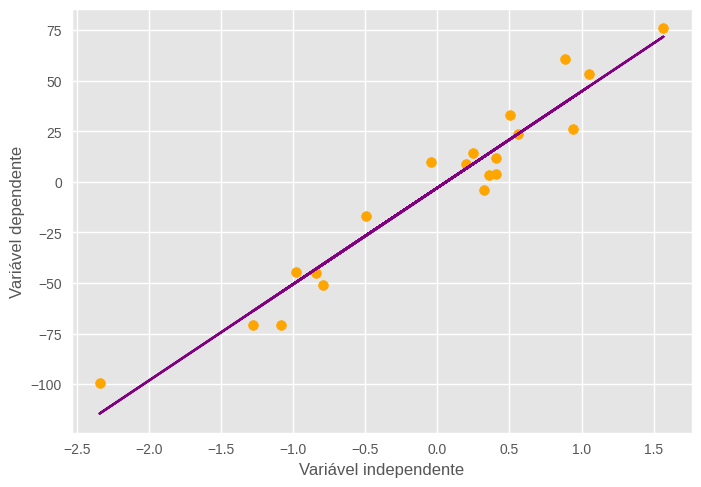

In [ ]:
# Plotando o gráfico de dispersão
plt.scatter(X, y, c='orange')
plt.plot(X, ŷ, c='purple')
plt.plot()
plt.xlabel("Variável independente")
plt.ylabel("Variável dependente")
plt.show()

Questão: Qual seria o valor da minha variável dependente (y) quando minha variável independente for -0.25?

In [ ]:
predict(alpha, beta, -0.25)

-14.781455808912463

O valor seria -14,78. 

E agora vamos utilizar bibliotecas que já fazem exatamente tudo que fizemos aqui de forma automática, sem precisar se preocupar com a matemática por trás do nosso algoritmo (mesmo sendo de extrema importância buscar entendê-lo), após isso iremos buscar validar nosso modelo com métricas de validação. 

Vamos utilizar o LinearRegression do scikit-learn (sklearn) para fazer o mesmo cálculo que fizemos.

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X,y)
  
#Print obtained theta values.
print(f"Melhor valor de alpha: {lr.intercept_}")
print(f"Melhor valor de beta: {lr.coef_[0]}")

Melhor valor de alpha: -2.8766617639698406
Melhor valor de beta: 47.61917617977051


O modelo do sklearn entregou exatamente o mesmo valor de alpha e beta que nosso modelo!

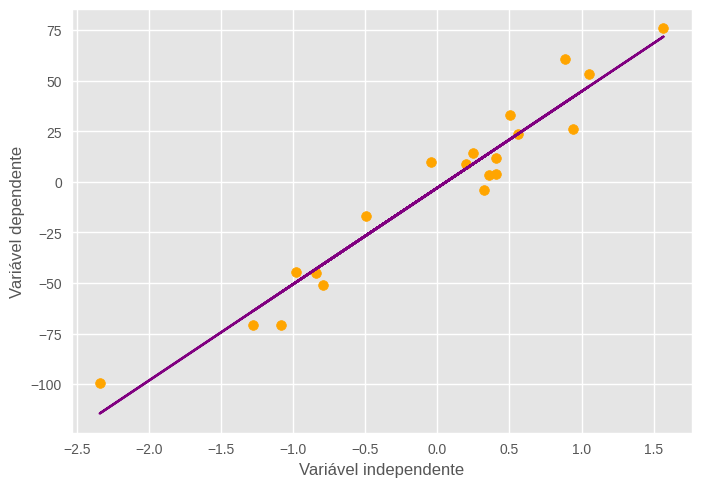

In [ ]:
ŷ = lr.predict(X)

plt.scatter(X, y, c='orange')
plt.plot(X, ŷ, c='purple')
plt.plot()
plt.xlabel("Variável independente")
plt.ylabel("Variável dependente")
plt.show()

Agora vamos voltar a nosso questionamento:

Questão: Qual seria o valor da minha variável dependente (y) quando minha variável independente for -0.25?

In [ ]:
lr.predict([[-0.25]])

array([-14.78145581])

Exatamente o mesmo valor que o nosso modelo! 

E agora vamos entender algumas métricas de validação para ver se nosso modelo está confiável.

## **Algumas métricas de validação**

- Trouxe apenas 3 aqui, posteriormente posso fazer um notebook de estudo sobre as outras diversas e suas aplicações

### **R quadrado**

O R quadrado é uma métrica comum de avaliação de modelos de regressão que mede o quão bem o modelo se ajusta aos dados observados. Ele compara a variação dos dados observados com a variação prevista pelo modelo. Um R quadrado alto significa que a maior parte da variação nos dados é explicada pelo modelo e que ele se ajusta bem aos dados. Por outro lado, um R quadrado baixo significa que o modelo não explica bem a variação nos dados e que há mais variação não explicada.

In [ ]:
print(f'R quadrado do modelo: {lr.score(X, y)}')

R quadrado do modelo: 0.9402010428758381


A função `score` retorna o R quadrado do nosso modelo. 

- Vale também mencionar o **R quadrado ajustado**, mas posso trazê-lo em outro momento, já que é mais aplicável em modelos com mais de uma variável independente.

### **Erro Médio Absoluto**

O Erro Médio Absoluto (MAE) é uma métrica comum usada na avaliação de modelos de Regressão Linear. Ele mede a média das diferenças absolutas entre os valores previstos pelo modelo e os valores reais. O MAE é útil porque fornece uma ideia da magnitude dos erros do modelo, o que pode ajudar a identificar onde o modelo está errando mais.

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y, ŷ))

MAE: 35.62149289231816


### **Erro Quadrático Médio**

O MSE (Mean Squared Error) é outra métrica comum usada para avaliar modelos de Regressão Linear. O MSE é a média dos erros quadrados entre as previsões do modelo e os valores reais. é calculado como a média dos erros quadrados entre as previsões do modelo e os valores reais. Quanto maior o erro entre a previsão e o valor real, maior será o erro quadrático. O MSE é a média desses erros quadráticos.

É importante notar que o MSE é uma métrica sensível a outliers, uma vez que os erros grandes são elevados ao quadrado. Portanto, o MSE pode ser enganoso se houver muitos outliers no conjunto de dados.

In [ ]:
print('MSE:', metrics.mean_squared_error(y, ŷ))

MSE: 2018.3541862044726


### **Resíduos**

Na análise de regressão linear, os resíduos são a diferença entre os valores observados e os valores previstos pelo modelo. Em outras palavras, os resíduos representam o quanto as previsões do modelo estão desviando dos valores reais.

Os resíduos são importantes porque podem nos ajudar a avaliar a qualidade do modelo de regressão linear. Se os resíduos forem pequenos e aleatórios, isso sugere que o modelo está se ajustando bem aos dados. Por outro lado, se os resíduos forem grandes e apresentarem algum padrão, isso pode indicar que o modelo não está se ajustando bem aos dados.

Uma forma comum de visualizar os resíduos é por meio de um gráfico de dispersão dos resíduos. Esse gráfico mostra os resíduos em relação às previsões do modelo. Se os resíduos forem aleatórios e distribuídos uniformemente em torno de zero, isso sugere que o modelo está se ajustando bem aos dados. Por outro lado, se os resíduos apresentarem um padrão, como uma curva em U ou em forma de sino, isso pode indicar que o modelo não está capturando corretamente as relações entre as variáveis.

Em resumo, os resíduos são uma ferramenta útil para avaliar a qualidade de um modelo de regressão linear. 

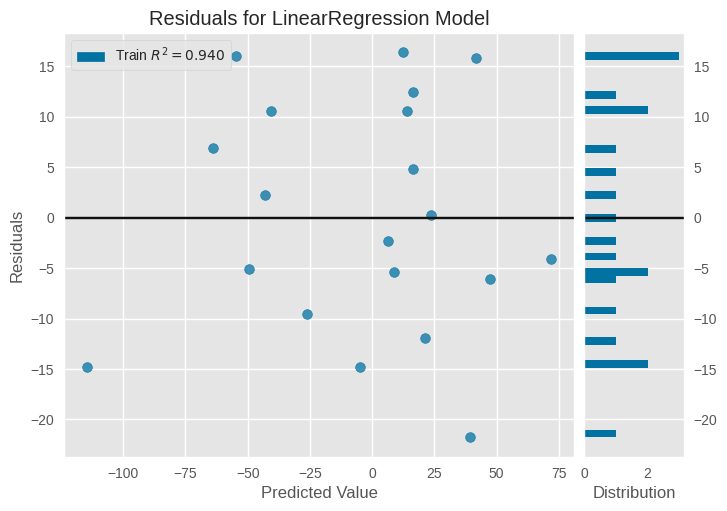

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot 

residuos = ResidualsPlot(lr)
residuos.fit(X, y)
residuos.poof()

# E na prática? 
- Vamos usar a bibilioteca scikit-learn para rodar um modelo de regressão em um dataset simples

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/Salary_Data.csv')

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.shape

(30, 2)

In [ ]:
X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values.reshape(-1, 1)

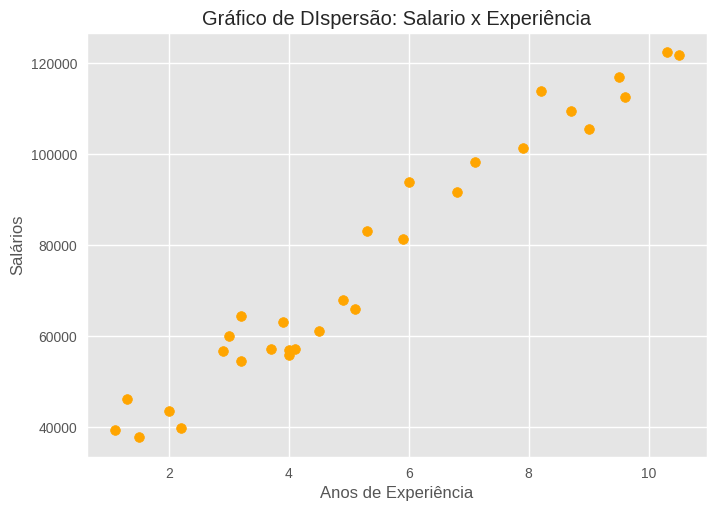

In [ ]:
plt.scatter(X, y, color='orange') 
plt.title("Gráfico de Dispersão: Salario x Experiência") 

plt.xlabel("Anos de Experiência") 
plt.ylabel("Salários") 
plt.show() 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

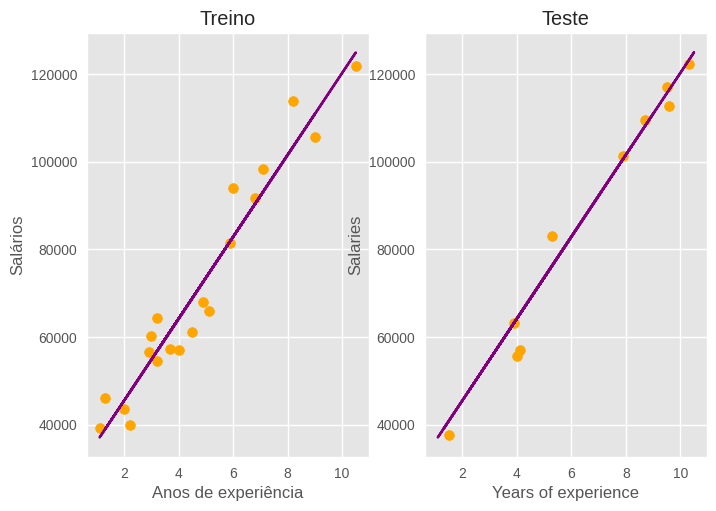

In [ ]:
#Definindo dois gráficos em uma linha
plt.subplots(nrows=1, ncols=2)

#Primeiro gráfico
plt.subplot(1,2,1)
plt.scatter(X_train, y_train, color='orange') 
plt.plot(X_train, lr.predict(X_train), color='purple')
plt.title("Treino")
plt.xlabel("Anos de experiência") 
plt.ylabel("Salários") 

#Segundo gráfico
plt.subplot(1,2,2)
plt.scatter(X_test, y_test, color='orange') 
plt.plot(X_train, lr.predict(X_train), color='purple')
plt.title("Teste")
plt.xlabel("Years of experience") 
plt.ylabel("Salaries") 
plt.show() 

In [ ]:
y_pred = lr.predict(X_test)  #Fazendo a predição

In [ ]:
print('Valor Real\tValor Previsto')
for i in range(0,9):
  print(str(y_test[i]) + '\t' + str(y_pred[i]))

Valor Real	Valor Previsto
[37731.]	[40835.10590871]
[122391.]	[123079.39940819]
[57081.]	[65134.55626083]
[63218.]	[63265.36777221]
[116969.]	[115602.64545369]
[109431.]	[108125.8914992]
[112635.]	[116537.23969801]
[55794.]	[64199.96201652]
[83088.]	[76349.68719258]


In [ ]:
print(f'R quadrado do modelo de treino: {lr.score(X_train, y_train)}')
print(f'R quadrado do modelo de teste: {lr.score(X_test, y_test)}')

R quadrado do modelo de treino: 0.9381900012894278
R quadrado do modelo de teste: 0.9749154407708353


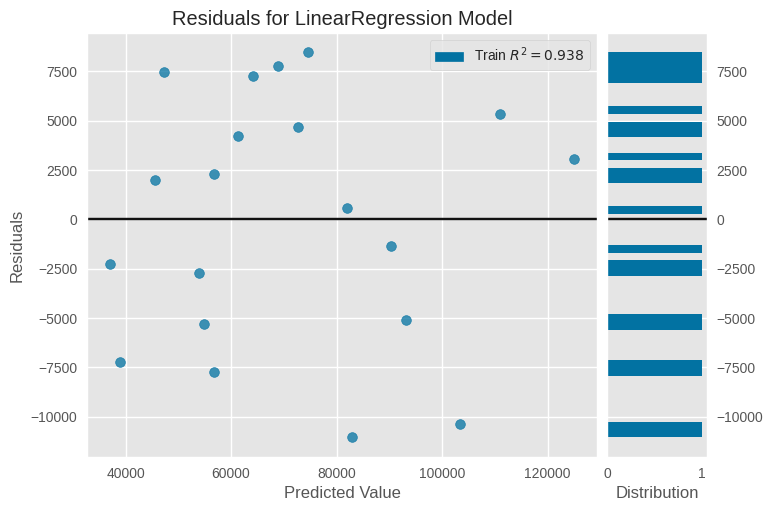

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
#Visualizar os resíduos do modelo

residuos = ResidualsPlot(lr)
residuos.fit(X_train,y_train)
residuos.poof()